In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train_path = r'D:\gesture\train'
test_path = r'D:\gesture\test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

imgs, labels = next(train_batches)

Found 3010 images belonging to 10 classes.
Found 3010 images belonging to 10 classes.


## plotting the images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

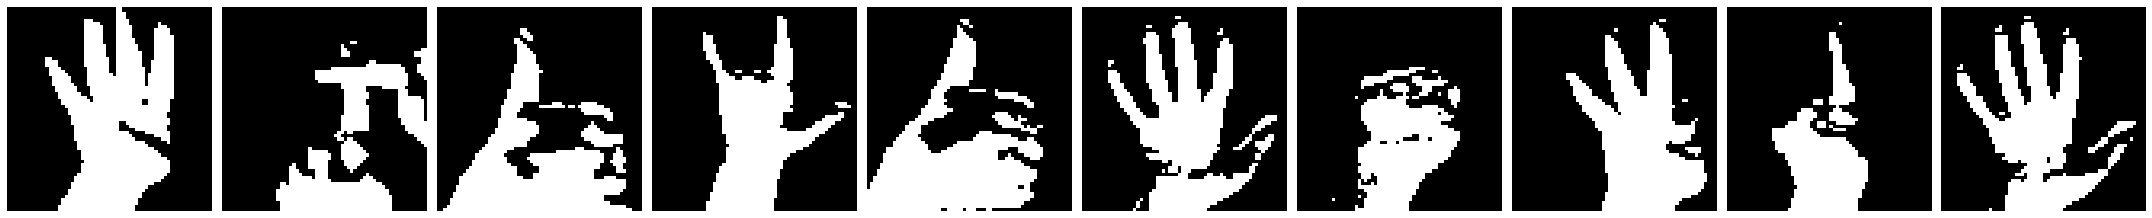

(10, 64, 64, 3)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [3]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

In [4]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(10,activation ="softmax"))

In [5]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [6]:
history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')



Epoch 1/10
301/301 [==============================] - 28s 91ms/step - loss: 0.7207 - accuracy: 0.9083 - val_loss: 1.1607 - val_accuracy: 0.7176
Epoch 2/10
301/301 [==============================] - 27s 89ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.1484 - val_accuracy: 0.7276
Epoch 3/10
301/301 [==============================] - 26s 87ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.1571 - val_accuracy: 0.7306
Epoch 4/10
301/301 [==============================] - 27s 90ms/step - loss: 9.4396e-04 - accuracy: 1.0000 - val_loss: 1.1662 - val_accuracy: 0.7319
loss of 1.0110580921173096; accuracy of 89.99999761581421%


In [7]:
model.save('D:\code')

INFO:tensorflow:Assets written to: D:\code\assets


INFO:tensorflow:Assets written to: D:\code\assets


In [8]:
print(history2.history)

{'loss': [0.7206869721412659, 0.002820565365254879, 0.0013356111012399197, 0.0009439575369469821], 'accuracy': [0.9083056449890137, 1.0, 1.0, 1.0], 'val_loss': [1.1607136726379395, 1.1483908891677856, 1.1571426391601562, 1.1661713123321533], 'val_accuracy': [0.7176079750061035, 0.7275747656822205, 0.7305647730827332, 0.7318936586380005], 'lr': [0.001, 0.001, 0.001, 0.0005]}


In [9]:
imgs, labels = next(test_batches)

In [10]:
model = keras.models.load_model('D:\code')

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()

loss of 0.18671554327011108; accuracy of 89.99999761581421%
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 62, 62, 32)        0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 31, 31, 32)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 31, 31, 64)        0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 15, 15, 64)        0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 13, 13, 128)       0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 6, 6, 128)         0         
______________________________________________________________

In [11]:
scores #[loss, accuracy] on test data...
model.metrics_names

['loss', 'accuracy']

In [12]:
word_dict = {0:'One',1:'Ten',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

predictions on a small set of test data--

Eight   Six   Nine   Six   Ten   Eight   Nine   Eight   Six   Eight   

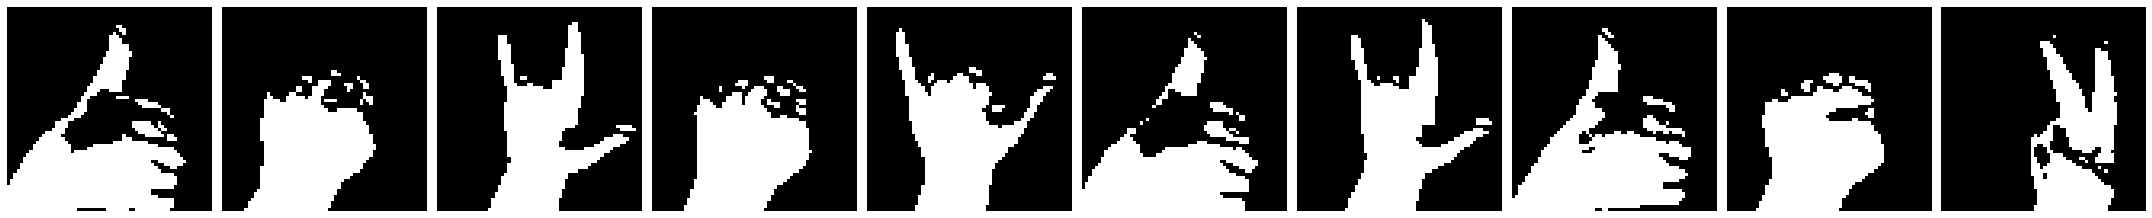

Actual labels
Eight   Six   Nine   Six   Ten   Eight   Nine   Eight   Six   Two   (10, 64, 64, 3)


{'loss': [0.7206869721412659,
  0.002820565365254879,
  0.0013356111012399197,
  0.0009439575369469821],
 'accuracy': [0.9083056449890137, 1.0, 1.0, 1.0],
 'val_loss': [1.1607136726379395,
  1.1483908891677856,
  1.1571426391601562,
  1.1661713123321533],
 'val_accuracy': [0.7176079750061035,
  0.7275747656822205,
  0.7305647730827332,
  0.7318936586380005],
 'lr': [0.001, 0.001, 0.001, 0.0005]}

In [13]:
plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

print(imgs.shape)

history2.history